***Analytical Solution***

Slope (m): 0.5079823640844785
Intercept (b): 39.56100405428882


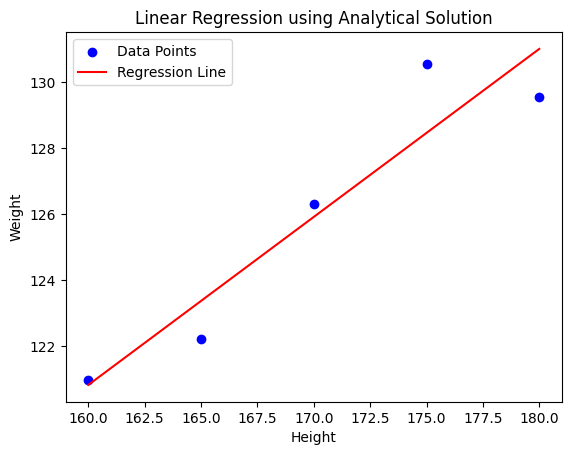

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression_analytical(x, y):
    n = len(x)

    # Calculate the required sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    # Calculate slope (m) and intercept (b)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    b = (sum_y - m * sum_x) / n

    return m, b

# Sample data with added noise
np.random.seed(42)  # for reproducibility
height = np.array([160, 165, 170, 175, 180])  # Heights in cm
weight = 0.5 * height + 40 + np.random.normal(0, 2, len(height))  # Adding noise to weight

slope, intercept = linear_regression_analytical(height, weight)

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

# Plotting the points
plt.scatter(height, weight, color='blue', label='Data Points')

# Plotting the regression line
regression_line = slope * height + intercept
plt.plot(height, regression_line, color='red', label='Regression Line')

# Adding labels and legend
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Linear Regression using Analytical Solution')
plt.legend()

# Display the plot
plt.show()

***The Normal Equation***

In [2]:
# Adding a column of ones to account for the bias term
height_b = np.c_[np.ones((len(height),1)), height]

theta_best = np.linalg.inv(height_b.T.dot(height_b)).dot(height_b.T).dot(weight)

print(f"Slope (m): {theta_best[1]}")
print(f"Intercept (b): {theta_best[0]}")

Slope (m): 0.5079823640844024
Intercept (b): 39.56100405430585


***The Singular Value Decomposition***

Slope (m): [0.50798236]
Intercept (b): 39.56100405430165


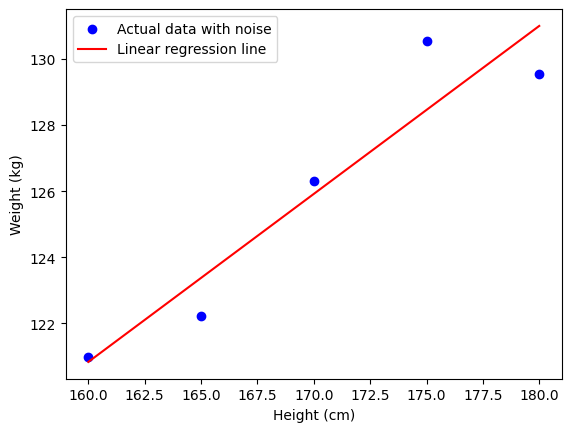

In [3]:
from sklearn.linear_model import LinearRegression

# Sample data with added noise
np.random.seed(42)  # for reproducibility
height = np.array([160, 165, 170, 175, 180])  # Heights in cm
weight = 0.5 * height + 40 + np.random.normal(0, 2, len(height))  # Adding noise to weight

# Reshape the data to a 2D array
height_2d = height.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(height_2d, weight)

print(f"Slope (m): {model.coef_}")
print(f"Intercept (b): {model.intercept_}")

# Predict weights based on the model
predicted_weight = model.predict(height_2d)

# Plot the data points and the regression line
plt.scatter(height, weight, color='blue', label='Actual data with noise')
plt.plot(height, predicted_weight, color='red', label='Linear regression line')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

***Multiple Linear Regression***

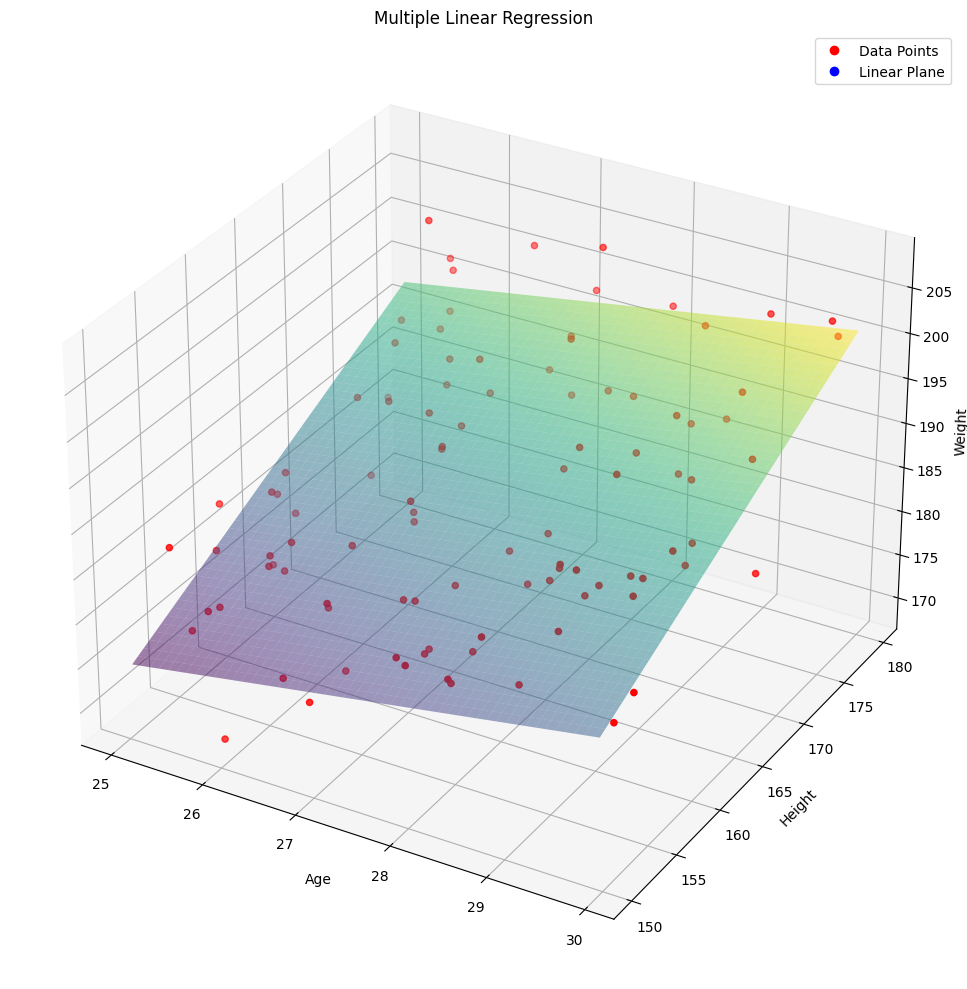

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# Generating random data with realistic features
np.random.seed(42)
age = 25 + 5 * np.random.rand(100, 1)  # Age between 25 and 30
height = 150 + 30 * np.random.rand(100, 1)  # Height between 150 and 180
weight = 50 + 2 * age + 0.5 * height + np.random.randn(100, 1) * 5  # Weight with some noise

# Creating the feature matrix X with two features
X = np.c_[age, height]

# Adding a column of ones to account for the bias term
X_b = np.c_[np.ones((100, 1)), X]

# Computing the normal equation to find optimal coefficients
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(weight)

# Visualizing the linear plane
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(age, height, weight, c='r', marker='o', label='Data Points')

# Creating a meshgrid for the plane
age_plane = np.linspace(min(age), max(age), 100)
height_plane = np.linspace(min(height), max(height), 100)
age_plane, height_plane = np.meshgrid(age_plane, height_plane)
weight_plane = theta_best[0] + theta_best[1] * age_plane + theta_best[2] * height_plane

# Plotting the linear plane
ax.plot_surface(age_plane, height_plane, weight_plane, alpha=0.5, cmap='viridis', label='Linear Plane')

ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('Multiple Linear Regression')

# Creating a legend
scatter_proxy = plt.Line2D([0], [0], linestyle="none", c='r', marker='o')
plane_proxy = plt.Line2D([0], [0], linestyle="none", c='b', marker='o')
ax.legend([scatter_proxy, plane_proxy], ['Data Points', 'Linear Plane'])

# Set different viewing angles
#ax.view_init(elev=0, azim=0)  # Adjust these angles as needed

# Adjusting layout to prevent clipping of the y-axis label
plt.tight_layout()

plt.show()

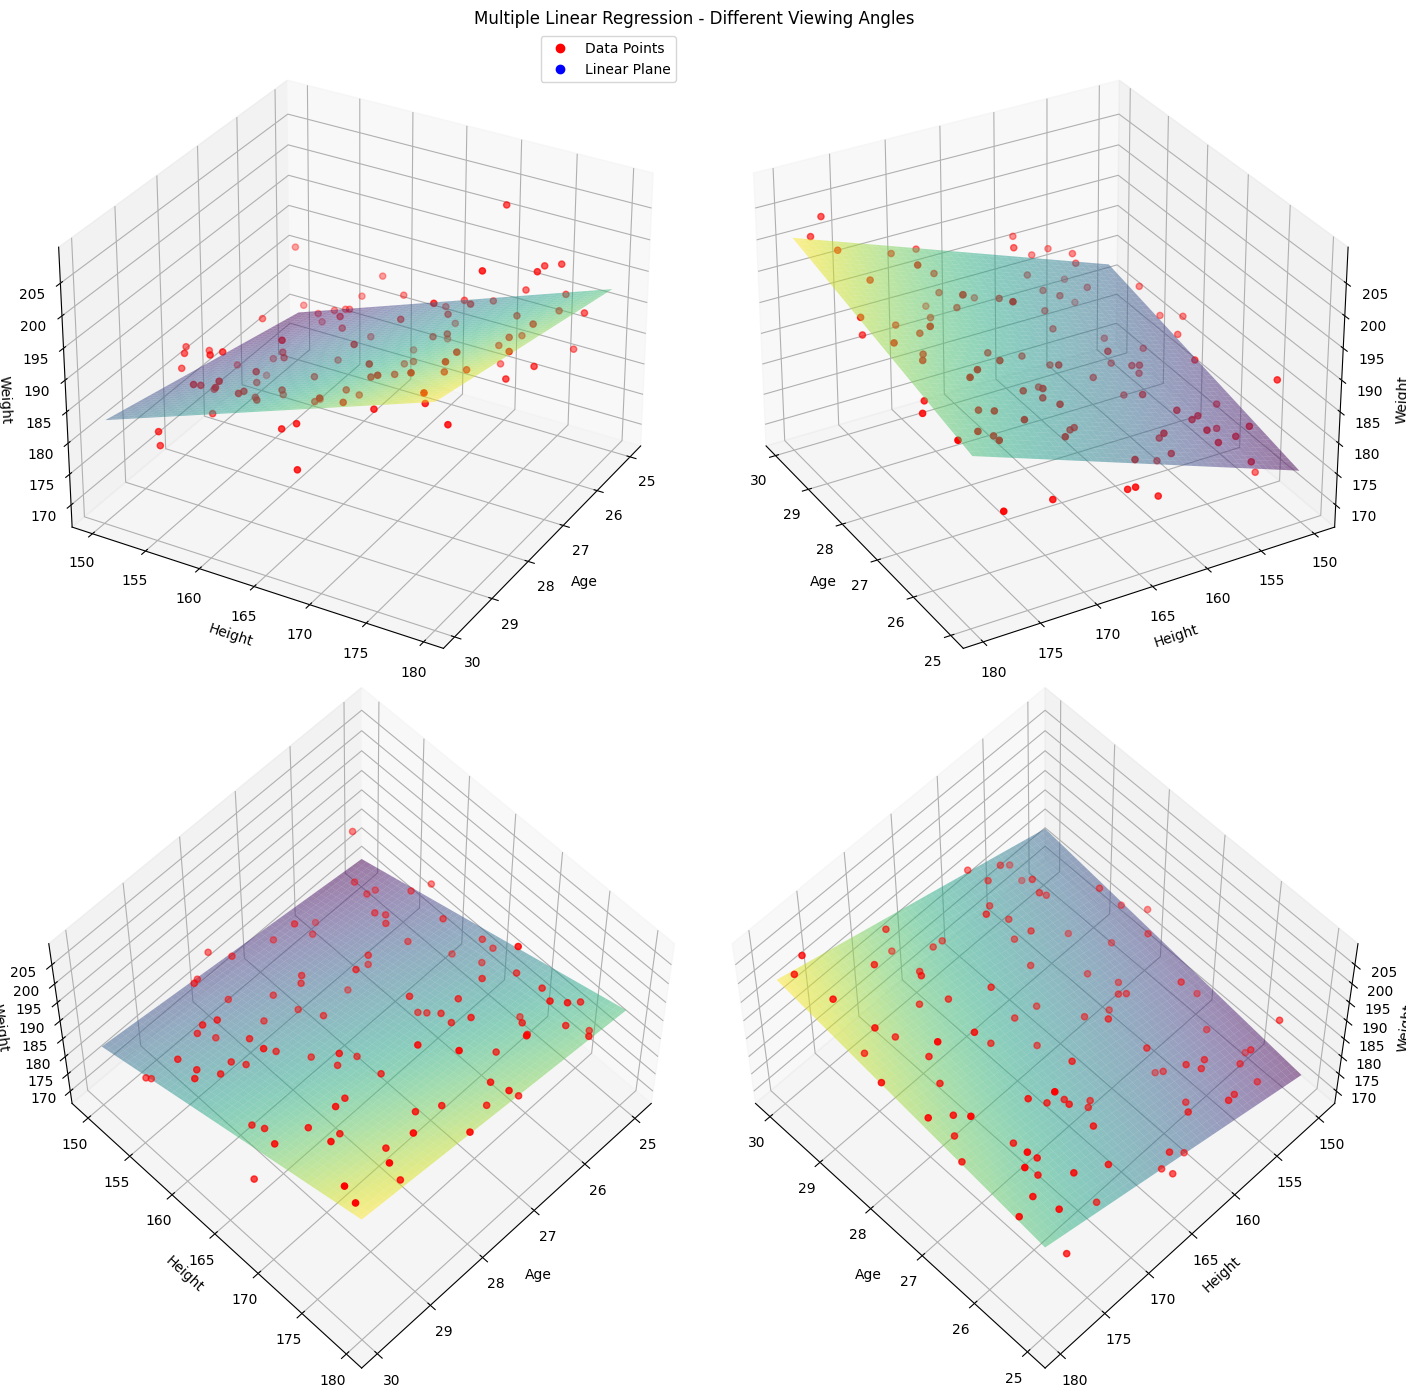

In [5]:
# Creating a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 14), subplot_kw={'projection': '3d'})
fig.suptitle('Multiple Linear Regression - Different Viewing Angles')

# Scatter plot of the data points on all subplots
for ax in axes.flat:
    ax.scatter(age, height, weight, c='r', marker='o', label='Data Points')

# Adjusting layout to prevent clipping of the y-axis label
plt.tight_layout()

# Setting different viewing angles for each subplot
angles = [(30, 30), (30, 150), (60, 45), (60, 135)]

for ax, angle in zip(axes.flat, angles):
    ax.view_init(elev=angle[0], azim=angle[1])  # Adjusting viewing angles

    # Creating a meshgrid for the plane
    age_plane = np.linspace(min(age), max(age), 100)
    height_plane = np.linspace(min(height), max(height), 100)
    age_plane, height_plane = np.meshgrid(age_plane, height_plane)
    weight_plane = theta_best[0] + theta_best[1] * age_plane + theta_best[2] * height_plane

    # Plotting the linear plane
    ax.plot_surface(age_plane, height_plane, weight_plane, alpha=0.5, cmap='viridis', label='Linear Plane')

    ax.set_xlabel('Age')
    ax.set_ylabel('Height')
    ax.set_zlabel('Weight')

# Creating a legend
scatter_proxy = plt.Line2D([0], [0], linestyle="none", c='r', marker='o')
plane_proxy = plt.Line2D([0], [0], linestyle="none", c='b', marker='o')
axes[0, 0].legend([scatter_proxy, plane_proxy], ['Data Points', 'Linear Plane'])

# Adjusting layout to prevent clipping of the y-axis label
plt.tight_layout()

plt.show()

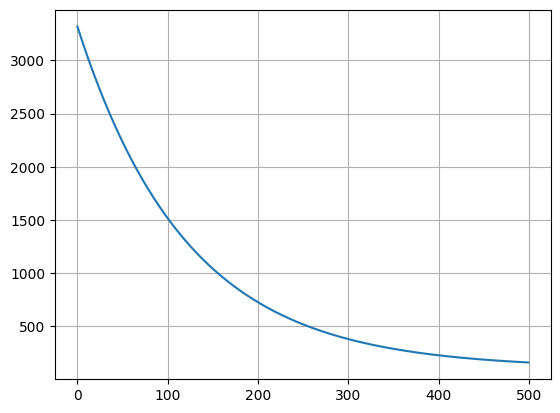

3.221509563237934 2.9525753584465257


In [8]:
np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

def calculate_ssr(X, y, m, b):
  predictions = m * X + b
  residuals = y - predictions
  ssr = np.sum(residuals**2)
  return ssr

def calculate_derivatives(X, y, m, b):
  predictions = m * X + b
  residuals = y - predictions
  derivative_m = -2 * np.sum(residuals * X)
  derivative_b = -2 * np.sum(residuals)
  return derivative_m, derivative_b

def gradient_descent(X, y, learning_rate, num_iterations):
  m = np.random.rand()
  b = np.random.rand()
  ssr_values = []

  for i in range(num_iterations):
    ssr = calculate_ssr(X, y, m, b)
    ssr_values.append(ssr)

    derivative_m, derivative_b = calculate_derivatives(X, y, m, b)
    m = m - learning_rate * derivative_m
    b = b - learning_rate * derivative_b

  return m, b, ssr_values

learning_rate = 0.00001
num_iterations = 500


optimal_m, optimal_b, ssr_history = gradient_descent(X, y, learning_rate, num_iterations)

plt.plot(range(num_iterations), ssr_history)
plt.grid(True)
plt.show()

print(optimal_m, optimal_b)

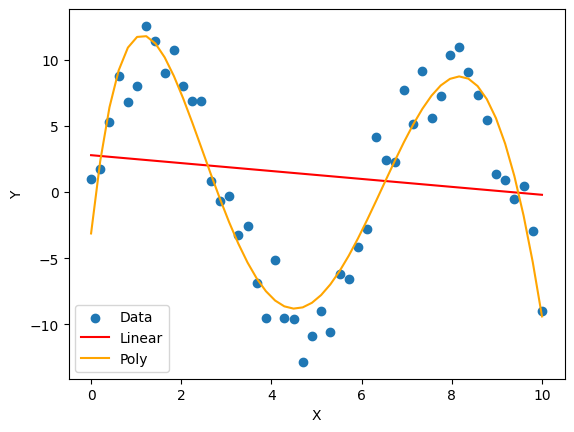

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1,1) #for 2D array
y = 10 * np.sin(X.flatten()) + np.random.randn(50) * 2

#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
linear_reg_predictions = lin_reg.predict(X)

#poly
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
poly_reg_predictions = poly_reg.predict(X_poly)

plt.scatter(X.flatten(), y, label="Data")
plt.plot(X.flatten(), linear_reg_predictions, color='red', label='Linear')
plt.plot(X.flatten(), poly_reg_predictions, color='orange', label='Poly')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()